## Logistic Regression for identifying depression given acceleration over a period of time and other data

=========col_max[ 27  29   2   3  60   1 600 470]
=========col_min[  0  20   1   1  10   0 130  10]
=========col_max[ 27  29   2   3  60   1 600 470]
=========col_min[  0  20   1   1  10   0 130  10]
[[ 0.77777778  0.66666667  0.         ...,  1.          0.95744681  0.        ]
 [ 0.59259259  0.55555556  1.         ...,  0.          0.87234043
   0.01086957]
 [ 0.          0.33333333  0.         ...,  0.          0.74468085
   0.23913043]
 ..., 
 [ 0.2962963   0.88888889  0.         ...,  0.          0.44680851
   0.54347826]
 [ 0.55555556  0.          1.         ...,  0.          0.93617021
   0.03695652]
 [ 0.7037037   0.88888889  0.         ...,  1.          0.87234043
   0.01086957]]
epoch:  300 loss: 0.952212 train_acc: 0.325000 test_acc: 0.391304
epoch:  600 loss: 0.782145 train_acc: 0.459783 test_acc: 0.517391
epoch:  900 loss: 0.727992 train_acc: 0.515217 test_acc: 0.521739
epoch: 1200 loss: 0.775066 train_acc: 0.569565 test_acc: 0.556522
epoch: 1500 loss: 0.730646 train_acc: 

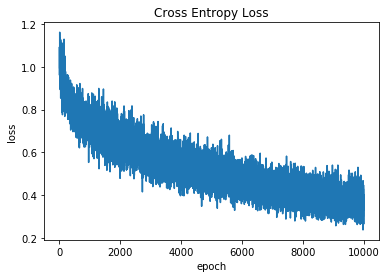

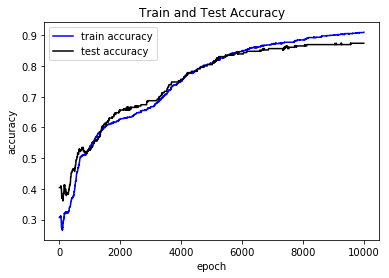

In [73]:
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np # linear algebra
import pickle

depression = pd.read_csv('depression.csv')
depression.shape

depression.head()

X = depression.drop(labels=['Depression'], axis=1).values

Y = depression.Depression.values

# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)


# set replace=False, Avoid double sampling
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)


# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]


# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    print('=========col_max'+str(col_max))
    col_min = np.min(data, axis=0)
    print('=========col_min'+str(col_min))
    return np.divide(data - col_min, col_max - col_min)

# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)
print(train_X)
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 8 features here, W's dimension is (8, 1)
A = tf.Variable(tf.random_normal(shape=[8, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 8])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

# Declare the model you need to learn
mod = tf.matmul(data, A) + b

# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))


# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 10000
reg_constant = 0.01

saver = tf.train.Saver()

# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)


# Define the goal
goal = opt.minimize(loss)


# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework


# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []


# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    depression_model = sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))
        
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()
pickle.dump(depression_model, open("depression_model.p", "wb"))

In [61]:
import numpy as np

def sigmoid (x):
    return 1/(1 + np.exp(-x))

X=np.array([0,0.592593,0,0.370370,0.444,0,0.59523,0.185185])
W=np.array([1.82382619,-0.1885512,0.94955128,-0.12272608,-1.30381572,0.16192029,0.92028898,-0.63416207])
b=-0.60293686

res = W.T.dot(X)+b
k = sigmoid(res)

print(k)

0.28727147713


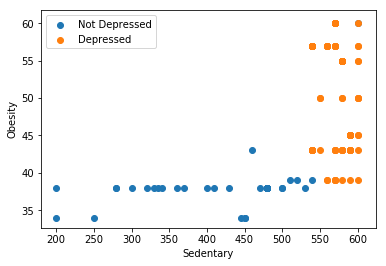

In [14]:
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

depression = pd.read_csv('depression.csv')
depression.shape

depression.head()
plt.scatter(depression[:58].Sedentary,depression[:58].Obesity, label='Not Depressed')
plt.scatter(depression[59:207].Sedentary,depression[59:207].Obesity, label='Depressed')
plt.xlabel('Sedentary')
plt.ylabel('Obesity')
plt.legend(loc='best')

## Traing the LSTM Model to recognize activities such as walking, running, sitting, going upstairs and coming downstairs

Data set : Wireless Sensor Monitoring Lab

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('data/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df.head()
N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
N_CLASSES = 6
N_HIDDEN_UNITS = 64
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")
L2_LOSS = 0.0015

l2 = L2_LOSS
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

N_EPOCHS = 50
BATCH_SIZE = 1024
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

pickle.dump(predictions, open("predictions.p", "wb"))
pickle.dump(history, open("history.p", "wb"))
tf.train.write_graph(sess.graph_def, '.', './checkpoint/har.pbtxt')  
saver.save(sess, save_path = "./checkpoint/har.ckpt")
sess.close()